<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/ADP_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:

!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import mean_squared_error , r2_score, f1_score, accuracy_score
from xgboost import XGBClassifier , XGBRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor

##### ‚úÖ 1-1  EDAÎ•º ÏãúÌñâ

In [34]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p1.csv',encoding= 'cp949')
df.head()

Age  Gender   BMI  DBP   FPG  Chol   Tri   HDL   LDL   ALT   CCR  FFPG
0   26       1  20.1   81  5.80  4.36  0.86  0.90  2.43  12.0  63.8  5.40
1   40       1  17.7   54  4.60  3.70  1.02  1.50  2.04   9.2  70.3  4.10
2   40       2  19.7   53  5.30  5.87  1.29  1.75  3.37  10.1  61.1  4.85
3   43       1  23.1   71  4.50  4.05  0.74  1.27  2.60  36.5  73.4  5.30
4   36       1  26.5   82  5.54  6.69  3.49  0.91  3.64  69.3  67.5  5.53

Age       Gender          BMI          DBP          FPG  \
count  4303.000000  4303.000000  4303.000000  4303.000000  4303.000000   
mean     48.085057     1.351615    24.123923    76.360446     5.226368   
std      14.686155     0.477530     3.397294    11.004056     0.781089   
min      22.000000     1.000000    15.600000    45.000000     1.780000   
25%      35.000000     1.000000    21.700000    69.000000     4.700000   
50%      46.000000     1.000000    24.000000    76.000000     5.140000   
75%      59.000000     2.000000    26.300000    83.000000     5.700000   
max      93.000000     2.000000    45.800000   134.000000     6.990000   

              Chol          Tri          HDL          LDL          ALT  \
count  4302.000000  4303.000000  4303.000000  4303.000000  4303.000000   
mean      4.860732     1.588476     1.666765     2.976220    26.754810   
std       0.925484     1.260003     1.079377     0.892196    22.279922   
min       1.650000     0.000000     0.000000     0.540000     4.500000   
25%       4.200000     0.860000     1.130000     2.350000    14.300000   
50%       4.790000     1.280000     1.340000     2.820000    20.500000   
75%       5.430000     1.940000     1.610000     3.420000    31.050000   
max      11.650000    32.640000     4.860753     6.270000   436.200000   

               CCR         FFPG  
count  4303.000000  4303.000000  
mean     71.557080     5.729084  
std      16.937394     1.424568  
min       4.860753     3.200000  
25%      60.000000     4.900000  
50%      72.000000     5.300000  
75%      82.300000     6.020000  
max     307.000000    29.700000

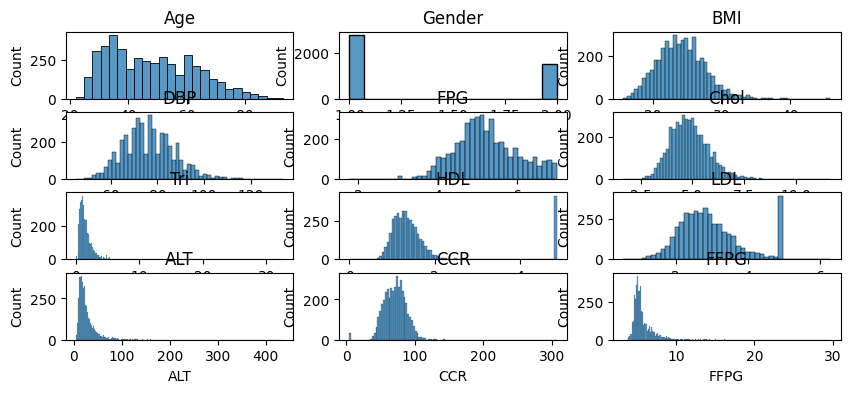


ÎåÄÎ∂ÄÎ∂ÑÏùò Îç∞Ïù¥ÌÑ∞Îäî Í≥†Î•¥Í≤å ÌçºÏ†∏ÏûàÎäî ÌòïÌÉúÎ°ú Ï°¥Ïû¨ÌïòÍ≥† ÏûàÏúºÎÇò, FPG, Chol, ALT, CRRÏùÄ ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞ÏßÑ Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉúÎ•º ÎùÑÍ≥† ÏûàÎã§. 
Í∏∞Ïà† ÌÜµÍ≥ÑÎüâÏùÑ Î≥¥ÏïòÏùÑ Îïå, ALTÏùò ÌëúÏ§ÄÌé∏Ï∞®Îäî 22.28, ÏµúÎåÄÍ∞íÏù¥ 436ÏúºÎ°ú Ïù¥ÏÉÅÏπòÎ°ú ÌåêÎã®ÎêòÏñ¥ÏßÄÎ©∞,CCR, FFPG ÎòêÌïú Ïù¥ÏÉÅÏπòÏùò Í∞ÄÎä•ÏÑ±Ïù¥ Ï°¥Ïû¨ÌïúÎã§. 
ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ ÌôïÏù∏Ìïú Í≤∞Í≥º, LDL - CHol, HDLÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÏûêÎØ∏„Öï, GenderÏôÄ CCRÏùò Í≤ΩÏö∞Îäî ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÎäîÎç∞
ÎÇ®ÎÖÄ Í∞Ñ CCRÏùò Ï∞®Ïù¥Í∞Ä ÎÇòÌÉÄÎÇúÎã§ÎäîÍ≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. Ìñ•ÌõÑ, Î∂ÑÏÑùÏóêÏÑú Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞ÌïòÍ±∞ÎÇò, Ï†ïÍ∑úÌôî ÎòêÎäî Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÌÜµÌï¥ 
Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï¥Î≥¥Ïù∏Îã§. 



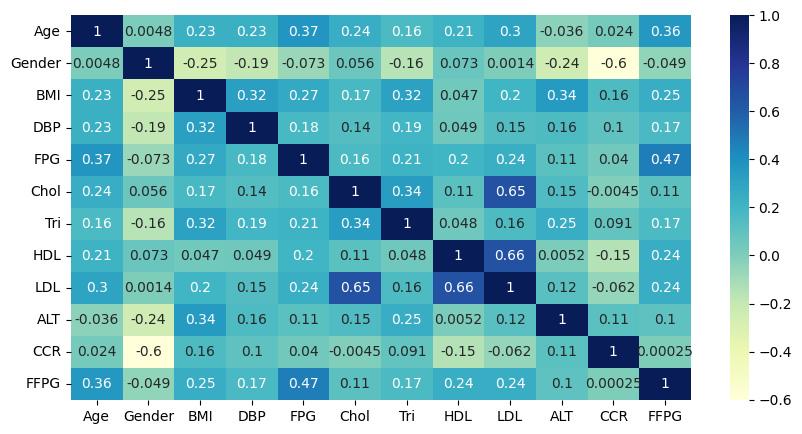

In [35]:
# 1) ÌÜµÍ≥ÑÎüâ
display(df.describe())

# 2) Î∂ÑÌè¨ÎèÑ Í∑∏Î¶º

fig, axes = plt.subplots(4, 3, figsize = (10, 4))

for i, axes in enumerate(axes.flat[: len(df.columns)]) :
  col_i = df.columns[i]
  sns.histplot(df[col_i], ax = axes)
  axes.set_title(col_i)

plt.show()

# 3) ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
cor_mat = df.corr()
plt.figure(figsize = (10,5))
sns.heatmap(cor_mat, cmap= 'YlGnBu' , annot = True)

print("""
ÎåÄÎ∂ÄÎ∂ÑÏùò Îç∞Ïù¥ÌÑ∞Îäî Í≥†Î•¥Í≤å ÌçºÏ†∏ÏûàÎäî ÌòïÌÉúÎ°ú Ï°¥Ïû¨ÌïòÍ≥† ÏûàÏúºÎÇò, FPG, Chol, ALT, CRRÏùÄ ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞ÏßÑ Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉúÎ•º ÎùÑÍ≥† ÏûàÎã§.
Í∏∞Ïà† ÌÜµÍ≥ÑÎüâÏùÑ Î≥¥ÏïòÏùÑ Îïå, ALTÏùò ÌëúÏ§ÄÌé∏Ï∞®Îäî 22.28, ÏµúÎåÄÍ∞íÏù¥ 436ÏúºÎ°ú Ïù¥ÏÉÅÏπòÎ°ú ÌåêÎã®ÎêòÏñ¥ÏßÄÎ©∞,CCR, FFPG ÎòêÌïú Ïù¥ÏÉÅÏπòÏùò Í∞ÄÎä•ÏÑ±Ïù¥ Ï°¥Ïû¨ÌïúÎã§.
ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ ÌôïÏù∏Ìïú Í≤∞Í≥º, LDL - CHol, HDLÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÏûêÎØ∏„Öï, GenderÏôÄ CCRÏùò Í≤ΩÏö∞Îäî ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÎäîÎç∞
ÎÇ®ÎÖÄ Í∞Ñ CCRÏùò Ï∞®Ïù¥Í∞Ä ÎÇòÌÉÄÎÇúÎã§ÎäîÍ≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. Ìñ•ÌõÑ, Î∂ÑÏÑùÏóêÏÑú Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞ÌïòÍ±∞ÎÇò, Ï†ïÍ∑úÌôî ÎòêÎäî Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÌÜµÌï¥
Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï¥Î≥¥Ïù∏Îã§.
""")

##### ‚úÖ 1-2  Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Í∞Ä ÌïÑÏöîÌïòÎã§Î©¥ ÏàòÌñâÌïòÍ≥† Ïù¥Ïú†Î•º ÏûëÏÑ±

In [36]:
# 1) Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨

def remove_outlier(df) :
  df2 = df.copy()
  for col in df2.columns :
    iqr = df2[col].quantile(0.75) - df2[col].quantile(0.25)
    upper = 1.5 * iqr + df2[col].quantile(0.75)
    lower = 1.5 * iqr - df2[col].quantile(0.25)

    df2 =  df2[(df2[col] <= upper) & (df2[col] >= lower)]

  return df2

remove_outlier_df = remove_outlier(df)


# 2) Scaling
df3 = remove_outlier_df.copy()
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
y = df3['DBP']
x = df3.drop(columns = ['DBP'], axis = 1)

s_x = pd.DataFrame(ss.fit_transform(x), columns = x.columns)

print("""
Îç∞Ïù¥ÌÑ∞Îäî Ïó∞ÏÜçÌòï Î≥ÄÏàòÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÏúºÎ©∞, Ï∂îÌõÑ Î∂ÑÏÑùÏùÑ ÏúÑÌï¥ Ïù¥ÏÉÅÏπò Ï†úÍ±∞ÏôÄ Ïä§ÏºÄÏùºÎßÅÏùÑ ÏàòÌñâÌï®
1) Ïù¥ÏÉÅÏπò Ï†úÍ±∞
  - IQRÎ•º ÏÇ¨Ïö©ÌïòÏó¨, ALT, Tri, CCRÏóêÏÑú Î≥¥Ïó¨ÏßÑ Í∑πÎã®Ï†ÅÏù∏ Ïù¥ÏÉÅÏπò Í∞íÎì§ÏùÑ Î™®ÌòïÏùò ÏïàÏ†ïÏÑ±ÏùÑ ÏúÑÌï¥ Ï†úÍ±∞
2) Ïä§ÏºÄÏùºÎßÅ
  - ÌèâÍ∑† 0, ÌëúÏ§ÄÌé∏Ï∞® 1Ïù¥ ÎêòÎèÑÎ°ù Ïä§ÏºÄÏùºÎßÅÏùÑ ÏàòÌñâÌï®ÏúºÎ°úÏç®, Î≥ÄÏàòÍ∞Ñ Îã®ÏúÑ Ï∞®Ïù¥Î•º Ï§ÑÏó¨, ÌäπÏ†ï Î≥ÄÏàòÏùò ÏòÅÌñ•Î†•Ïù¥ Í≥ºÎèÑÌïòÍ≤å Ïª§ÏßÄÎäî Í≤ÉÏùÑ Î∞©ÏßÄ
""")


Îç∞Ïù¥ÌÑ∞Îäî Ïó∞ÏÜçÌòï Î≥ÄÏàòÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÏúºÎ©∞, Ï∂îÌõÑ Î∂ÑÏÑùÏùÑ ÏúÑÌï¥ Ïù¥ÏÉÅÏπò Ï†úÍ±∞ÏôÄ Ïä§ÏºÄÏùºÎßÅÏùÑ ÏàòÌñâÌï® 
1) Ïù¥ÏÉÅÏπò Ï†úÍ±∞ 
  - IQRÎ•º ÏÇ¨Ïö©ÌïòÏó¨, ALT, Tri, CCRÏóêÏÑú Î≥¥Ïó¨ÏßÑ Í∑πÎã®Ï†ÅÏù∏ Ïù¥ÏÉÅÏπò Í∞íÎì§ÏùÑ Î™®ÌòïÏùò ÏïàÏ†ïÏÑ±ÏùÑ ÏúÑÌï¥ Ï†úÍ±∞ 
2) Ïä§ÏºÄÏùºÎßÅ 
  - ÌèâÍ∑† 0, ÌëúÏ§ÄÌé∏Ï∞® 1Ïù¥ ÎêòÎèÑÎ°ù Ïä§ÏºÄÏùºÎßÅÏùÑ ÏàòÌñâÌï®ÏúºÎ°úÏç®, Î≥ÄÏàòÍ∞Ñ Îã®ÏúÑ Ï∞®Ïù¥Î•º Ï§ÑÏó¨, ÌäπÏ†ï Î≥ÄÏàòÏùò ÏòÅÌñ•Î†•Ïù¥ Í≥ºÎèÑÌïòÍ≤å Ïª§ÏßÄÎäî Í≤ÉÏùÑ Î∞©ÏßÄ 



##### ‚úÖ 1-3 train test setÏùÑ DBPÏª¨Îüº Í∏∞Ï§ÄÏúºÎ°ú 7:3 ÎπÑÏú®Î°ú ÎÇòÎàÑÍ≥† Ïûò ÎÇòÎâòÏóàÎäîÏßÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇ¥Îùº

In [63]:
X_train, X_test, y_train, y_test = train_test_split(s_x, y, test_size = 0.3 ,random_state = 1234)

## ÎèÖÎ¶Ω ÌëúÎ≥∏ TÍ≤ÄÏ†ï
# Îëê ÌèâÍ∑†ÏùÄ Í∞ôÎã§
# Îëê ÌèâÍ∑†ÏùÄ Í∞ôÏßÄ ÏïäÎã§.
from scipy.stats import ttest_ind

stat, p_val = ttest_ind(y_train, y_test, equal_var = False)

if p_val < 0.05 :
  print(f'p_value :{p_val} - Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å ')
else :
  print(f'p_value :{p_val} - Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉùÏúºÎ°ú Îëê ÌèâÍ∑†ÏùÄ Í∞ôÎã§, Ï¶â Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÑÌï†Ïù¥ Ïûò Ïù¥Î£®Ïñ¥ÏßêÏùÑ ÎÇòÌÉÄÎÇ∏Îã§')

# 2) CountÎ°ú
count = pd.DataFrame({
    'set' : ['train','test'] ,
    'count' : [y_train.count() , y_test.count() ]
    })

count['ratio'] = count['count'] / len(x)
print(count)

p_value :0.1728821735711939 - Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉùÏúºÎ°ú Îëê ÌèâÍ∑†ÏùÄ Í∞ôÎã§, Ï¶â Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÑÌï†Ïù¥ Ïûò Ïù¥Î£®Ïñ¥ÏßêÏùÑ ÎÇòÌÉÄÎÇ∏Îã§
     set  count    ratio
0  train   1558  0.69991
1   test    668  0.30009


##### ‚úÖ 1-4 ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ï∞®ÏõêÏ∂ïÏÜåÏùò ÌïÑÏöîÏÑ±ÏùÑ ÎÖºÌïòÍ≥†, ÌïÑÏöîÏóê Îî∞Îùº Ï∞®ÏõêÏùÑ Ï∂ïÏÜåÌïòÍ≥† Î∂àÌïÑÏöîÌïòÎã§Î©¥ Í∑∏ Í∑ºÍ±∞

In [88]:
## Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìïú Îç∞Ïù¥ÌÑ∞ ÏÖãÏúºÎ°ú ÏßÑÌñâ

# 1) ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌôïÏù∏
cor_df = df3.corr().unstack().reset_index()
over8 = cor_df[(cor_df['level_0'] != cor_df['level_1']) & (np.abs(cor_df.iloc[:,-1]) > 0.7)]
print(over8)
print("""
Chol Í≥º LDLÏùÄ ÎÜíÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÏûàÎã§. Ïù¥Îü¨Ìïú Î≥ÄÏàòÏåçÏùÄ Î∂ÑÏÑùÏóê Ìè¨Ìï®ÎêòÎäî Í≤ΩÏö∞, Ï§ëÎ≥µÎêú Ï†ïÎ≥¥Î°ú Í∞ÑÏ£º Îê† Ïàò ÏûàÎã§.
""")

    level_0 level_1         0
68     Chol     LDL  0.886817
101     LDL    Chol  0.886817



In [89]:
# 2) VIF

vif = pd.DataFrame()
vif['columns'] = df3.columns

vif['VIF'] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]
print(vif)
print("""
VIF Í∞Ä 10 Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ Îß§Ïö∞ Í∞ïÌïú Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÏûàÎäî Í≤ÉÏúºÎ°ú Í∞ÑÏ£º ÎêòÏñ¥ÏßÑÎã§. Ïù¥Îäî Ïó¨Îü¨ ÎèÖÎ¶Ω Î≥ÄÏàòÎì§ ÏÇ¨Ïù¥Ïóê
Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Ï°¥Ïû¨ÌïòÎäî ÌòÑÏÉÅÏùÑ ÏùòÎØ∏ÌïúÎã§. Îã§Ï§ë Í≥µÏÑ†ÏÑ±Ïù¥ ÎÜíÏùÄ Í≤ΩÏö∞, Î™®Ìòï Ìï¥ÏÑùÏù¥ Ïñ¥Î†µÍ≥†, ÌöåÍ∑Ä Í≥ÑÏàòÏùò
Ïã†Î¢∞ÎèÑÍ∞Ä Ï†ÄÌïòÎê† Ïàò ÏûàÎã§.

ÏúÑÏùò ÏÉÅÍ¥ÄÎ∂ÑÏÑùÍ≥º VIF ÏùÑ ÌÜµÌï¥ Ï∞®ÏõêÏùò Ï∂ïÏÜåÍ∞Ä ÌïÑÏöîÌï† Í≤ÉÏúºÎ°ú Î≥¥Ïó¨ÏßÑÎã§.
""")

   columns         VIF
0      Age   15.738849
1   Gender   13.993863
2      BMI   78.348957
3      DBP   58.206395
4      FPG   78.534013
5     Chol  246.468022
6      Tri    9.995531
7      HDL   32.331216
8      LDL  121.194800
9      ALT    7.783972
10     CCR   35.172576
11    FFPG   99.325735
 
VIF Í∞Ä 10 Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ Îß§Ïö∞ Í∞ïÌïú Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÏûàÎäî Í≤ÉÏúºÎ°ú Í∞ÑÏ£º ÎêòÏñ¥ÏßÑÎã§. Ïù¥Îäî Ïó¨Îü¨ ÎèÖÎ¶Ω Î≥ÄÏàòÎì§ ÏÇ¨Ïù¥Ïóê 
Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Ï°¥Ïû¨ÌïòÎäî ÌòÑÏÉÅÏùÑ ÏùòÎØ∏ÌïúÎã§. Îã§Ï§ë Í≥µÏÑ†ÏÑ±Ïù¥ ÎÜíÏùÄ Í≤ΩÏö∞, Î™®Ìòï Ìï¥ÏÑùÏù¥ Ïñ¥Î†µÍ≥†, ÌöåÍ∑Ä Í≥ÑÏàòÏùò 
Ïã†Î¢∞ÎèÑÍ∞Ä Ï†ÄÌïòÎê† Ïàò ÏûàÎã§. 

ÏúÑÏùò ÏÉÅÍ¥ÄÎ∂ÑÏÑùÍ≥º VIF ÏùÑ ÌÜµÌï¥ Ï∞®ÏõêÏùò Ï∂ïÏÜåÍ∞Ä ÌïÑÏöîÌï† Í≤ÉÏúºÎ°ú Î≥¥Ïó¨ÏßÑÎã§.



0         1         2         3         4         5         6   \
ratio   0.222407  0.197012  0.151148  0.102607  0.078457  0.065681  0.059748   
cumsum  0.222407  0.419419  0.570567  0.673174  0.751631  0.817312  0.877060   

              7         8         9         10  
ratio   0.052725  0.035884  0.027019  0.007313  
cumsum  0.929785  0.965668  0.992687  1.000000

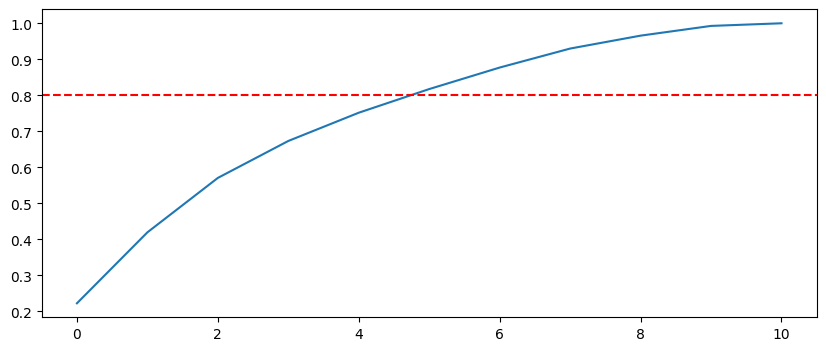

In [106]:
# Ï∞®Ïõê Ï∂ïÏÜå
pca_x = df3.drop(columns = 'DBP', axis = 1)

pca_x = df3.drop(columns = 'DBP', axis = 1)
s_x = pd.DataFrame(ss.fit_transform(pca_x), columns = x.columns)

pca = PCA()
pca.fit(s_x)

pca_df = pd.DataFrame(
    {'ratio' : pca.explained_variance_ratio_,
     'cumsum' : pca.explained_variance_ratio_.cumsum()
    }
)
plt.figure(figsize = (10, 4))
plt.plot(pca_df.index, pca_df['cumsum'])
plt.axhline(0.8, linestyle = '--', color = 'red')
display(pca_df.T)

print("""
pca Î∂ÑÏÑù Í≤∞Í≥º 6Í∞úÏùò Ï£ºÏÑ±Î∂ÑÏù¥ ÏÑ§Î™ÖÌïòÎäî Î∂ÑÏÇ∞ ÎπÑÏú®Ïù¥ 80%ÏùÑ ÏÑ§Î™ÖÌïòÍ∏∞ ÎïåÎ¨∏Ïóê PC5 ÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞Î°ú Ï∞®ÏõêÏùÑ Ï∂ïÏÜåÌïúÎã§.
""")

In [110]:
## Ï∞®Ïõê Ï∂ïÏÜå ÌõÑ X Ïû¨ÏÉùÏÑ±
pca = PCA(n_components= 6)
pca_6 = pca.fit_transform(s_x)

pca_x = pd.DataFrame(pca_6, columns = ['PC_' + str(x) for x in range(1,7)])

##### ‚úÖ 1- 5  ÏûëÏóÖ ÌõÑ Îç∞Ïù¥ÌÑ∞Í∞Ä ÌöåÍ∑ÄÎ∂ÑÏÑùÏùò Í∏∞Î≥∏Í∞ÄÏ†ï Îî∞Î•¥ÎäîÏßÄ ÏÑ§Î™Ö

In [ ]:
print("""
ÌöåÍ∑Ä Î∂ÑÏÑùÏùò Í∏∞Î≥∏Í∞ÄÏ†ï
1) ÏÑ†ÌòïÏÑ± : ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò ÏÇ¨Ïù¥Ïóê ÏÑ†ÌòïÍ¥ÄÍ≥Ñ
2) Îì±Î∂ÑÏÇ∞ÏÑ± : Ïò§Ï∞®Ìï≠Ïùò Î∂ÑÏÇ∞ÏùÄ ÏùºÏ†ï
3) ÎèÖÎ¶ΩÏÑ± : Ïò§Ï∞®Ìï≠Îì§ÏùÄ ÏÑúÎ°ú ÎèÖÎ¶Ω„ÖàÍ±∞Ïù¥Îã§
4) Ï†ïÍ∑úÏÑ± : ÏûîÏ∞®Îäî Ï†ïÍ∑ú Î∂ÑÌè¨Î•º Îî∞Î•∏Îã§.
""")

In [119]:
import statsmodels.api as sm

xx = sm.add_constant(pca_x)
lr = sm.OLS(y.reset_index(drop = True), xx).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    DBP   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     45.78
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           4.41e-53
Time:                        09:20:16   Log-Likelihood:                -8193.3
No. Observations:                2226   AIC:                         1.640e+04
Df Residuals:                    2219   BIC:                         1.644e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.4591      0.204    375.167      0.0

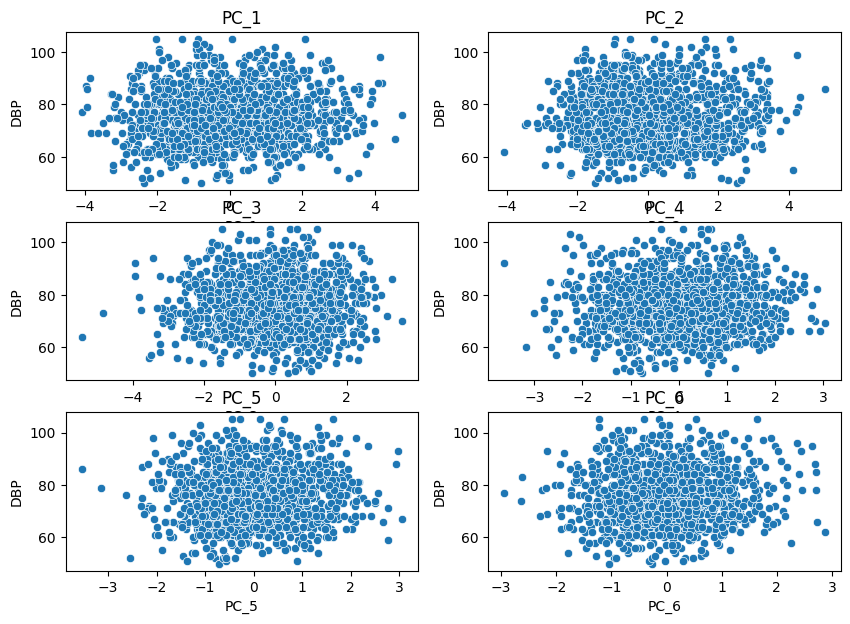


Í∞Å ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ ÏÑ†Ìòï Í¥ÄÍ≥Ñ Ïó¨Î∂ÄÎ•º ÌååÏïÖÌïòÍ∏∞ ÏúÑÌï¥ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌïú Í∑∏ÎûòÌîÑ 
Ï†êÎì§Ïù¥ ÏßÅÏÑ† ÌòïÌÉúÎ°ú ÌçºÏ†∏ ÏûàÎäî Í≤ÉÏùÄ ÏÑ†ÌòïÏÑ± Í∞ÄÏ†ïÏùÑ Ï∂©Ï°±ÌïúÎã§Í≥† Ìï† Ïàò ÏûàÎã§. 



In [133]:
fig, axes = plt.subplots(3,2, figsize = (10,7))

for i , axes in enumerate(axes.flat[:len(pca_x.columns)]) :
  col_i = pca_x.columns[i]
  sns.scatterplot(x= pca_x[col_i], y = y , ax = axes)
  axes.set_title(col_i)

plt.show()
print("""
Í∞Å ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ ÏÑ†Ìòï Í¥ÄÍ≥Ñ Ïó¨Î∂ÄÎ•º ÌååÏïÖÌïòÍ∏∞ ÏúÑÌï¥ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌïú Í∑∏ÎûòÌîÑ
Ï†êÎì§Ïù¥ ÏßÅÏÑ† ÌòïÌÉúÎ°ú ÌçºÏ†∏ ÏûàÎäî Í≤ÉÏùÄ ÏÑ†ÌòïÏÑ± Í∞ÄÏ†ïÏùÑ Ï∂©Ï°±ÌïúÎã§Í≥† Ìï† Ïàò ÏûàÎã§.
""")

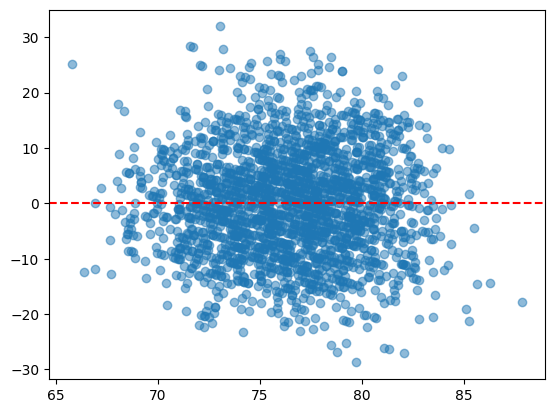

In [134]:
resid = lr.resid
fitted = lr.fittedvalues

#  Îì±Î∂ÑÏÇ∞ÏÑ± ÌôïÏù∏: ÏòàÏ∏°Í∞í vs ÏûîÏ∞® ÌîåÎ°Ø
plt.scatter(fitted, resid, alpha = 0.5)
plt.axhline(0, linestyle='--', color='red')


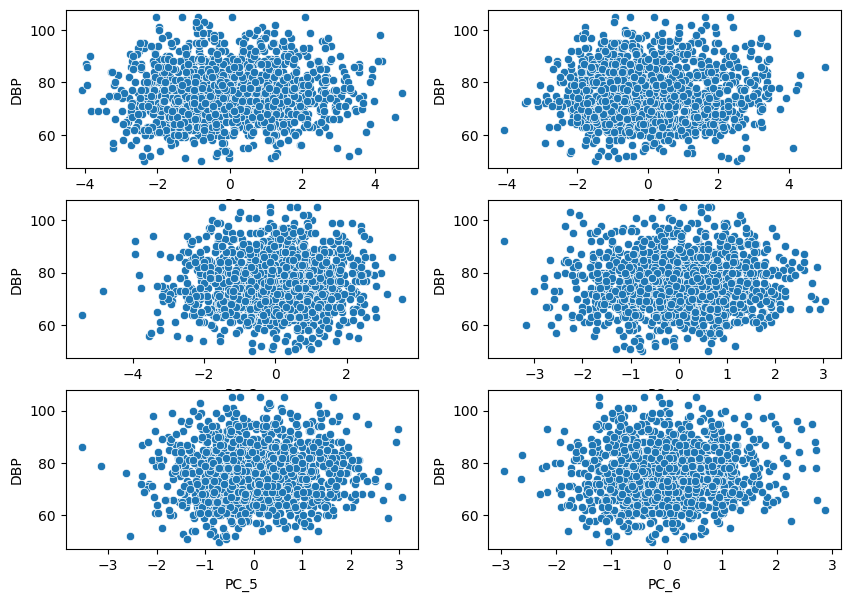

In [131]:
fig, axes = plt.subplots(3,2, figsize = (10,7))

for i , axes in enumerate(axes.flat[:len(pca_x.columns)]) :
  col_i = pca_x.columns[i]
  sns.scatterplot(x= pca_x[col_i], y = y , ax = axes)

In [137]:
# ÎèÖÎ¶ΩÏÑ±
# Durbin-Watson:                   2.053

# Îì±Î∂ÑÏÇ∞ÏÑ±
import statsmodels.stats.api as sms
stat, p_val , f_sta , f_pv = sms.het_breuschpagan(resid, lr.model.exog)
print(p_val) ## 8.514813229912212e-05

# p_val > 0.05 Îì±Î∂ÑÏÑ± Í∞ÄÏ†ï ÎßåÏ°±

# Í∑ÄÎ¨¥ : Î∂ÑÏÇ∞Ïù¥ ÏùºÏ†ïÌïòÎã§
# ÎåÄÎ¶Ω : Î∂ÑÏÇ∞Ïù¥ ÏùºÏ†ïÌïòÏßÄ ÏïäÎã§.

8.514813229912212e-05


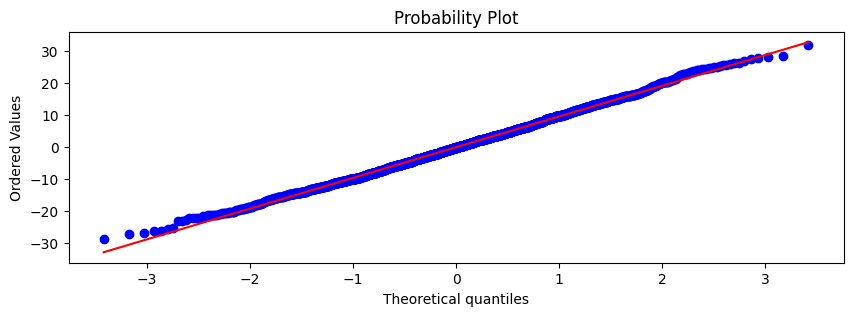

In [143]:
# Ï†ïÍ∑úÏÑ± - QQ-plot
import scipy.stats as stats
fig, ax = plt.subplots(figsize  = (10, 3))
stats.probplot(resid, dist= 'norm', plot= ax)
plt.show()
# ÏûîÏ∞®Í∞Ä ÏßÅÏÑ†ÏùÑ Ïú†ÏßÄÌïòÎ©¥ Ï†ïÍ∑úÏÑ± Í∞ÄÏ†ïÏù¥ ÎßåÏ°±Îêú Í≤É

##### ‚úÖ 1- 6  ÌöåÍ∑ÄÎ∂ÑÏÑù ÏïåÍ≥†Î¶¨Ï¶ò 3Í∞úÎ•º ÏÑ†ÌÉùÌïòÍ≥† ÏÑ†Ï†ïÏù¥Ïú†ÏôÄ Ïû•Îã®Ï†ê

In [144]:
print('''
[SVM (Support Vector Machine)]
 > ÌäπÏßï
 - SVMÏùÄ Î∂ÑÎ•ò(classification)ÏôÄ ÌöåÍ∑Ä(regression) Î™®ÎëêÏóê ÏÇ¨Ïö©Îê† Ïàò ÏûàÎã§.
 - SVMÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º Ïûò Î™®Îç∏ÎßÅÌï† Ïàò ÏûàÎèÑÎ°ù Ïª§ÎÑê Í∏∞Î≤ïÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§.
 - Ï£ºÎ°ú ÏÑ†Ìòï Ïª§ÎÑê, Îã§Ìï≠Ïãù Ïª§ÎÑê, ÎòêÎäî Í∞ÄÏö∞ÏãúÏïà RBF Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©ÌïúÎã§.
 - ÏµúÎåÄ ÎßàÏßÑÏùÑ ÌôúÏö©ÌïòÏó¨ Í≤∞Ï†ï Í≤ΩÍ≥ÑÎ•º Ï∞æÏúºÎ©∞, Ïù¥Î°ú Ïù∏Ìï¥ ÏùºÎ∞òÌôî ÏÑ±Îä•Ïù¥ Îõ∞Ïñ¥ÎÇòÎã§.

 > Ïû•Ï†ê :
 - SVMÏùÄ ÏÑ†Ìòï Î∞è ÎπÑÏÑ†Ìòï Î∂ÑÎ•ò Î¨∏Ï†úÏóêÏÑú Ïö∞ÏàòÌïú ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥Î©∞,
   Ïù¥ÏÉÅÏπò(outlier)Ïóê ÎåÄÌïú Í∞ïÌïú Ï†ÄÌï≠Î†•ÏùÑ Í∞ÄÏßÑÎã§.
 - Îã§ÏñëÌïú Ïª§ÎÑê Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îã§ÏñëÌïú Îç∞Ïù¥ÌÑ∞ Ïú†ÌòïÏóê ÎåÄÏùëÌï† Ïàò ÏûàÎã§.
 - SVMÏùÄ ÏµúÎåÄ ÎßàÏßÑÏùÑ Ï∂îÍµ¨ÌïòÎØÄÎ°ú ÏùºÎ∞òÌôî ÏÑ±Îä•Ïù¥ Ïö∞ÏàòÌïòÎã§.

 > Îã®Ï†ê
 - SVMÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò Ïä§ÏºÄÏùºÏóê ÎØºÍ∞êÌïòÎØÄÎ°ú Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Í∞Ä Ï§ëÏöîÌïòÎã§.
 - ÎåÄÏö©Îüâ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑúÎäî Í≥ÑÏÇ∞ ÎπÑÏö©Ïù¥ ÎÜíÏùÑ Ïàò ÏûàÏúºÎ©∞, ÌïôÏäµ ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÎã§.


[XGBoost (eXtreme Gradient Boosting)]
 > ÌäπÏßï
 - XGBoostÎäî Ìä∏Î¶¨ Í∏∞Î∞òÏùò ÏïôÏÉÅÎ∏î ÌïôÏäµ Î™®Îç∏Î°ú, Í∑∏ÎùºÎîîÏñ∏Ìä∏ Î∂ÄÏä§ÌåÖ(Gradient Boosting)ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌïòÎ©∞,
 Í≥ºÏ†ÅÌï©ÏùÑ Ï§ÑÏù¥Í∏∞ ÏúÑÌïú Ï†ïÍ∑úÌôîÏôÄ Í∞ÄÏßÄÏπòÍ∏∞ Í∏∞Îä•ÏùÑ Ìè¨Ìï®ÌïòÍ≥† ÏûàÎã§.
 - ÏÜçÎèÑÏôÄ ÏÑ±Îä• Î©¥ÏóêÏÑú Ïö∞ÏàòÌïòÎ©∞, Îã§ÏñëÌïú Î∂ÑÎ•ò Î∞è ÌöåÍ∑Ä Î¨∏Ï†úÏóê Ï†ÅÏö©Ìï† Ïàò ÏûàÎã§.
 - ÌäπÏßï Ï§ëÏöîÎèÑ (Î≥ÄÏàò Ï§ëÏöîÎèÑ)Î•º Í≥ÑÏÇ∞ÌïòÏó¨ Î≥ÄÏàò ÏÑ†ÌÉùÍ≥º Î™®Îç∏ Ìï¥ÏÑùÏóê Ïö©Ïù¥ÌïòÎã§.

 > Ïû•Ï†ê
 - XGBoostÎäî ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞ Í≤ΩÏßÑ ÎåÄÌöåÏóêÏÑú Ïö∞ÏäπÏùÑ Ï∞®ÏßÄÌïòÎ©∞, Îã§ÏñëÌïú Îç∞Ïù¥ÌÑ∞ Ïú†ÌòïÏóêÏÑú Îõ∞Ïñ¥ÎÇú ÏÑ±Îä•ÏùÑ Î≥¥Ïù∏Îã§.
 - ÌöåÍ∑Ä, Î∂ÑÎ•ò, Îû≠ÌÇπ, ÏòàÏ∏° Î¨∏Ï†úÏóê ÎåÄÌïú Îã§ÏñëÌïú ÏÜêÏã§ Ìï®ÏàòÎ•º Ï†úÍ≥µÌïúÎã§.
 - Ï†ïÍ∑úÌôîÏôÄ Í∞ÄÏßÄÏπòÍ∏∞ Í∏∞Îä•ÏùÑ ÌÜµÌï¥ Í≥ºÏ†ÅÌï©ÏùÑ Ï§ÑÏùº Ïàò ÏûàÎã§.

 > Îã®Ï†ê
 - Ï†ÅÏ†àÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏÑ†ÌÉùÌïòÍ≥† ÌäúÎãùÌïòÎäîÎç∞ ÏãúÍ∞ÑÍ≥º ÎÖ∏Î†•Ïù¥ ÌïÑÏöîÌïòÎã§.
 - Î©îÎ™®Î¶¨ ÏöîÍµ¨ÎüâÏù¥ ÌÅ¨Í≥†, ÎåÄÏö©Îüâ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÌïôÏäµ Î∞è ÏòàÏ∏° ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÎã§.


[RandomForest]
 > ÌäπÏßï
 - RandomForestÎäî ÏùòÏÇ¨Í≤∞Ï†ï Ìä∏Î¶¨(Decision Tree)Î•º Í∏∞Î∞òÏúºÎ°ú ÌïòÎäî ÏïôÏÉÅÎ∏î ÌïôÏäµ Î™®Îç∏Ïù¥Îã§.
 - Ïó¨Îü¨ Í∞úÏùò ÏùòÏÇ¨Í≤∞Ï†ï Ìä∏Î¶¨Î•º ÏÉùÏÑ±ÌïòÍ≥†
   Í∞Å Ìä∏Î¶¨Ïùò ÏòàÏ∏° Í≤∞Í≥ºÎ•º Í≤∞Ìï©ÌïòÏó¨ ÏïàÏ†ïÏ†ÅÏù¥Í≥† Í∞ïÎ†•Ìïú ÏòàÏ∏°ÏùÑ Ï†úÍ≥µÌïúÎã§.
 - Í≥ºÏ†ÅÌï©ÏùÑ Ï§ÑÏù¥Í∏∞ ÏúÑÌïú Î∂ÄÌä∏Ïä§Ìä∏Îû© ÏÉòÌîåÎßÅÍ≥º Î¨¥ÏûëÏúÑ ÌäπÏÑ± ÏÑ†ÌÉùÏùÑ ÏÇ¨Ïö©ÌïúÎã§.

 > Ïû•Ï†ê
 - RandomForestÎäî Í≥ºÏ†ÅÌï©ÏùÑ ÌîºÌïòÎ©¥ÏÑú Ï¢ãÏùÄ ÏòàÏ∏° ÏÑ±Îä•ÏùÑ Ï†úÍ≥µÌï† Ïàò ÏûàÎã§.
 - ÌäπÏßï Ï§ëÏöîÎèÑ (Î≥ÄÏàò Ï§ëÏöîÎèÑ) Î•º ÌèâÍ∞ÄÌïòÍ≥† Î™®Îç∏ Ìï¥ÏÑùÏóê Ïö©Ïù¥ÌïòÎã§.
 - Î∂ÑÎ•ò Î∞è ÌöåÍ∑Ä Î¨∏Ï†ú Îì± Îã§ÏñëÌïú Îç∞Ïù¥ÌÑ∞Ïóê ÎÑêÎ¶¨ ÏÇ¨Ïö©Í∞ÄÎä•ÌïòÎã§.

 > Îã®Ï†ê
 - Ìä∏Î¶¨Ïùò Í∞úÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù Î™®Îç∏Ïù¥ Î≥µÏû°Ìï¥Ï†∏ Í≥ºÏ†ÅÌï© Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏïÑÏßà Ïàò ÏûàÎã§.
   (ÌïôÏäµÎç∞Ïù¥ÌÑ∞ÏÖãÏóê Í≥ºÎåÄÏ†ÅÌï©) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï°∞Ï†àÌïòÏó¨ Ïù¥Î•º Î∞©ÏßÄÌïòÎ†§Îäî ÎÖ∏Î†•ÏùÑ Ìï¥ÏïºÌïúÎã§.
 - RandomForestÎäî Îã§ÏàòÏùò Ìä∏Î¶¨Î•º Í≤∞Ìï©ÌïòÏó¨ ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÎØÄÎ°ú Í∞úÎ≥Ñ Ìä∏Î¶¨ Ìï¥ÏÑùÏù¥ Ïñ¥Î†µÎã§.
''')


[SVM (Support Vector Machine)]
 > ÌäπÏßï
 - SVMÏùÄ Î∂ÑÎ•ò(classification)ÏôÄ ÌöåÍ∑Ä(regression) Î™®ÎëêÏóê ÏÇ¨Ïö©Îê† Ïàò ÏûàÎã§.
 - SVMÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º Ïûò Î™®Îç∏ÎßÅÌï† Ïàò ÏûàÎèÑÎ°ù Ïª§ÎÑê Í∏∞Î≤ïÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§. 
 - Ï£ºÎ°ú ÏÑ†Ìòï Ïª§ÎÑê, Îã§Ìï≠Ïãù Ïª§ÎÑê, ÎòêÎäî Í∞ÄÏö∞ÏãúÏïà RBF Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©ÌïúÎã§.
 - ÏµúÎåÄ ÎßàÏßÑÏùÑ ÌôúÏö©ÌïòÏó¨ Í≤∞Ï†ï Í≤ΩÍ≥ÑÎ•º Ï∞æÏúºÎ©∞, Ïù¥Î°ú Ïù∏Ìï¥ ÏùºÎ∞òÌôî ÏÑ±Îä•Ïù¥ Îõ∞Ïñ¥ÎÇòÎã§.

 > Ïû•Ï†ê :
 - SVMÏùÄ ÏÑ†Ìòï Î∞è ÎπÑÏÑ†Ìòï Î∂ÑÎ•ò Î¨∏Ï†úÏóêÏÑú Ïö∞ÏàòÌïú ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥Î©∞, 
   Ïù¥ÏÉÅÏπò(outlier)Ïóê ÎåÄÌïú Í∞ïÌïú Ï†ÄÌï≠Î†•ÏùÑ Í∞ÄÏßÑÎã§.
 - Îã§ÏñëÌïú Ïª§ÎÑê Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îã§ÏñëÌïú Îç∞Ïù¥ÌÑ∞ Ïú†ÌòïÏóê ÎåÄÏùëÌï† Ïàò ÏûàÎã§.
 - SVMÏùÄ ÏµúÎåÄ ÎßàÏßÑÏùÑ Ï∂îÍµ¨ÌïòÎØÄÎ°ú ÏùºÎ∞òÌôî ÏÑ±Îä•Ïù¥ Ïö∞ÏàòÌïòÎã§.

 > Îã®Ï†ê
 - SVMÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò Ïä§ÏºÄÏùºÏóê ÎØºÍ∞êÌïòÎØÄÎ°ú Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Í∞Ä Ï§ëÏöîÌïòÎã§.
 - ÎåÄÏö©Îüâ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑúÎäî Í≥ÑÏÇ∞ ÎπÑÏö©Ïù¥ ÎÜíÏùÑ Ïàò ÏûàÏúºÎ©∞, ÌïôÏäµ ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÎã§.
 
 
[XGBo

In [150]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


def modelling(model, name) :
  x_train, x_test, y_train, y_test = train_test_split(pca_x, y, test_size = 0.3, random_state = 134)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  MSE = np.sqrt(mean_squared_error(y_test, pred))
  r2 = r2_score(y_test, pred)

  return MSE, r2


res = []
for name, model  in [['SVR' , SVR()], ['XGB', XGBRegressor()],['Random_Forest',RandomForestRegressor(random_state = 44)]] :
  MSE, r2 = modelling(model, name)
  res.append([name, MSE, r2])

display(pd.DataFrame(res, columns = ['name', 'MSE','r2']))



name        MSE        r2
0            SVR   9.638175  0.101302
1            XGB  10.650447 -0.097386
2  Random_Forest   9.761046  0.078243

##### ‚úÖ 1-7 Í∞ÄÏû• ÏµúÏ†ÅÌôîÎêú ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Ïù¥Ïö©ÌïòÏó¨ K-Fold ÍµêÏ∞®Í≤ÄÏ¶ùÏùÑ ÏàòÌñâ

In [156]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle = True, random_state = 45)

# ‚úÖ cross_val_score()Îäî Ï†ÑÏ≤¥ X, y Îç∞Ïù¥ÌÑ∞
score = cross_val_score(SVR(), pca_x, y,  scoring= 'neg_mean_squared_error', cv = kfold,)

MSE = -score
display(pd.DataFrame({'Fold_Number' : range(1, len(MSE) + 1),
             'MSE' : MSE}))
print(MSE.mean())
print('''
ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ïö∞ÏàòÌïú SVR Î™®Îç∏Î°ú 5-Fold ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÏàòÌñâ
SVR Î™®Îç∏ÏùÄ Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº ÏùºÏ†ïÌïú ÏÑ±Îä•ÏùÑ Ïú†ÏßÄÌïòÎ©∞ Í∞Å FoldÎ≥ÑÎ°ú MSEÏùò Ï∞®Ïù¥Í∞Ä ÌÅ¨ÏßÄ ÏïäÎã§.
Ïù¥Îäî Í≥ºÏ†ÅÌï© ÏóÜÏù¥ ÏïàÏ†ïÏ†ÅÏù∏ ÏÑ±Îä•ÏùÑ Î≥¥Ïù∏Îã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÇ∏Îã§.
''')

Fold_Number        MSE
0            1  93.979076
1            2  84.611618
2            3  91.034267
3            4  95.362592
4            5  96.269996

92.2515098045635

ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ïö∞ÏàòÌïú SVR Î™®Îç∏Î°ú 5-Fold ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÏàòÌñâ 
SVR Î™®Îç∏ÏùÄ Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº ÏùºÏ†ïÌïú ÏÑ±Îä•ÏùÑ Ïú†ÏßÄÌïòÎ©∞ Í∞Å FoldÎ≥ÑÎ°ú MSEÏùò Ï∞®Ïù¥Í∞Ä ÌÅ¨ÏßÄ ÏïäÎã§. 
Ïù¥Îäî Í≥ºÏ†ÅÌï© ÏóÜÏù¥ ÏïàÏ†ïÏ†ÅÏù∏ ÏÑ±Îä•ÏùÑ Î≥¥Ïù∏Îã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÇ∏Îã§.



##### ‚úÖ 2-1. Î∞úÏÉùÏãúÍ∞ÅÏùÑ ÌÜµÌï¥ ÌèâÏùºÏù∏ÏßÄ Ï£ºÎßêÏù∏ÏßÄÎ•º Íµ¨Î∂ÑÌïòÎäî 'Ï£ºÎßêÏó¨Î∂Ä' Î≤îÏ£ºÌòï Î≥ÄÏàò Ï∂îÍ∞ÄÌïòÍ≥† Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º ÌôïÏù∏ÌïòÎùº. </br> (Ïõî ~ Í∏àÏùÄ ÌèâÏùº, ÌÜ†ÏöîÏùºÍ≥º ÏùºÏöîÏùºÏùÑ Ï£ºÎßê)

    ÎåÄÏÉÅÏÇ¨Í≥† : Ìï¥Îãπ 1ÎÖÑÍ∞Ñ Î∞úÏÉùÌïú Í∞ÄÌï¥ ÎòêÎäî ÌîºÌï¥Ï∞®Ï¢ÖÏù¥ ÏûêÏ†ÑÍ±∞Ïù∏ ÍµêÌÜµÏÇ¨Í≥†
    Îã§Î∞úÏßÄÏó≠ ÏÑ†Ï†ïÏ°∞Í±¥ : Î∞òÍ≤Ω 300m ÎÇ¥ ÎåÄÏÉÅÏÇ¨Í≥† 4Í±¥Ïù¥ÏÉÅ Î∞úÏÉùÏßÄÏó≠
    Ï¢ÖÏÜç Î≥ÄÏàò : ÌîºÌï¥ÏûêÏã†Ï≤¥ÏÉÅÌï¥Ï†ïÎèÑ

In [263]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p2.csv',encoding='cp949')
df.head(3)


ÏÇ¨Í≥†ÎÇ¥Ïö© Í∞ÄÌï¥ÏûêÏÑ±Î≥Ñ Í∞ÄÌï¥ÏûêÏó∞Î†π Í∞ÄÌï¥ÏûêÏ∞®Ï¢Ö ÌîºÌï¥ÏûêÏã†Ï≤¥ÏÉÅÌï¥Ï†ïÎèÑ        ÏÇ¨Í≥†Ïú†Ìòï Í∏∞ÏÉÅÏÉÅÌÉú  ÏÇ¨ÎßùÏûêÏàò            Î∞úÏÉùÏãúÍ∞Å
0   Í≤ΩÏÉÅ     Ïó¨   75ÏÑ∏   ÏûêÏ†ÑÍ±∞        Í≤ΩÏÉÅ    Ï∞®ÎåÄÏ∞® - Í∏∞ÌÉÄ   ÎßëÏùå     0  2018-04-03 15Ïãú
1   Ï§ëÏÉÅ     Ïó¨   26ÏÑ∏   ÏûêÏ†ÑÍ±∞        Ï§ëÏÉÅ  Ï∞®ÎåÄÏ∞® - Ï∏°Î©¥Ï∂©Îèå   ÎßëÏùå     0  2018-04-21 13Ïãú
2   Ï§ëÏÉÅ     ÎÇ®   34ÏÑ∏   ÏûêÏ†ÑÍ±∞        Ï§ëÏÉÅ    Ï∞®ÎåÄÏ∞® - Í∏∞ÌÉÄ   ÎßëÏùå     0  2018-05-01 08Ïãú

In [264]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
df = df.dropna()

In [269]:
df['Î∞úÏÉùÏãúÍ∞Å'] = pd.to_datetime(df['Î∞úÏÉùÏãúÍ∞Å'], format = '%Y-%m-%d %HÏãú')

# 5,6 ÌÜ†ÏöîÏùº, ÏùºÏöîÏùº
df['Ï£ºÎßêÏó¨Î∂Ä'] = df['Î∞úÏÉùÏãúÍ∞Å'].apply(lambda x : 'Ï£ºÎßê' if x.dayofweek >= 5 else 'ÌèâÏùº')
df.head()

ÏÇ¨Í≥†ÎÇ¥Ïö© Í∞ÄÌï¥ÏûêÏÑ±Î≥Ñ Í∞ÄÌï¥ÏûêÏó∞Î†π Í∞ÄÌï¥ÏûêÏ∞®Ï¢Ö ÌîºÌï¥ÏûêÏã†Ï≤¥ÏÉÅÌï¥Ï†ïÎèÑ        ÏÇ¨Í≥†Ïú†Ìòï Í∏∞ÏÉÅÏÉÅÌÉú  ÏÇ¨ÎßùÏûêÏàò                Î∞úÏÉùÏãúÍ∞Å  \
0   Í≤ΩÏÉÅ     Ïó¨   75ÏÑ∏   ÏûêÏ†ÑÍ±∞        Í≤ΩÏÉÅ    Ï∞®ÎåÄÏ∞® - Í∏∞ÌÉÄ   ÎßëÏùå     0 2018-04-03 15:00:00   
1   Ï§ëÏÉÅ     Ïó¨   26ÏÑ∏   ÏûêÏ†ÑÍ±∞        Ï§ëÏÉÅ  Ï∞®ÎåÄÏ∞® - Ï∏°Î©¥Ï∂©Îèå   ÎßëÏùå     0 2018-04-21 13:00:00   
2   Ï§ëÏÉÅ     ÎÇ®   34ÏÑ∏   ÏûêÏ†ÑÍ±∞        Ï§ëÏÉÅ    Ï∞®ÎåÄÏ∞® - Í∏∞ÌÉÄ   ÎßëÏùå     0 2018-05-01 08:00:00   
3   Í≤ΩÏÉÅ     ÎÇ®   45ÏÑ∏   ÏûêÏ†ÑÍ±∞        Í≤ΩÏÉÅ    Ï∞®ÎåÄÏ∞® - Í∏∞ÌÉÄ   ÎßëÏùå     0 2018-06-03 18:00:00   
4   Ï§ëÏÉÅ     ÎÇ®   20ÏÑ∏   ÏûêÏ†ÑÍ±∞        Ï§ëÏÉÅ  Ï∞®ÎåÄÏ∞® - Ï∏°Î©¥Ï∂©Îèå   ÎßëÏùå     0 2018-06-28 16:00:00   

  Ï£ºÎßêÏó¨Î∂Ä  
0   ÌèâÏùº  
1   Ï£ºÎßê  
2   ÌèâÏùº  
3   Ï£ºÎßê  
4   ÌèâÏùº

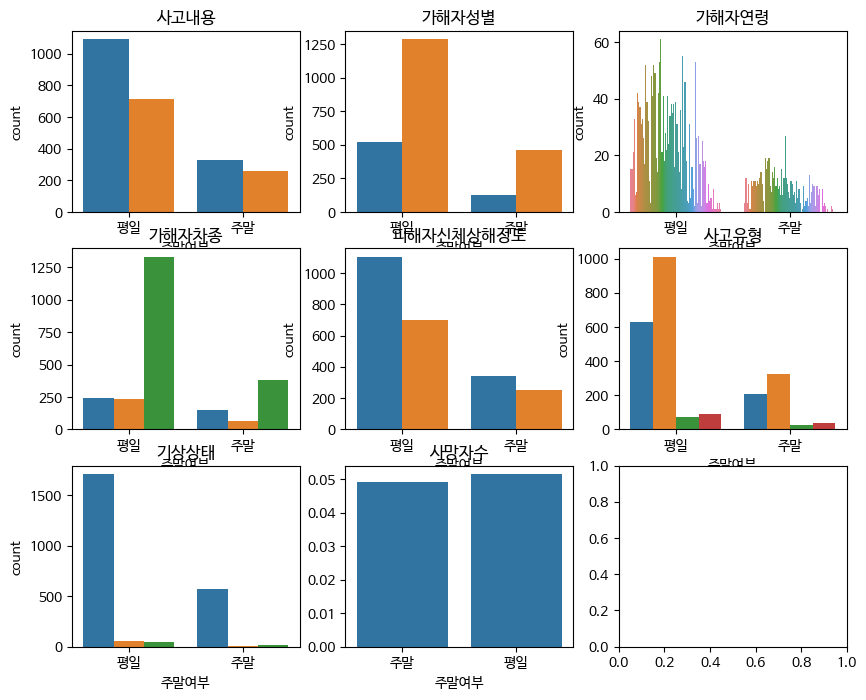

In [270]:

fig, axes = plt.subplots(3, 3, figsize = (10, 8))

for i, axes in enumerate(axes.flat[: len(df.columns.difference(['Î∞úÏÉùÏãúÍ∞Å', 'Ï£ºÎßêÏó¨Î∂Ä']))]):
  col_i = df.columns[i]
  if col_i == 'ÏÇ¨ÎßùÏûêÏàò' :
    target = df[[col_i, 'Ï£ºÎßêÏó¨Î∂Ä']].groupby('Ï£ºÎßêÏó¨Î∂Ä')[col_i].mean()
    sns.barplot(x = target.index, y = target.values, ax = axes)



  else :
    sns.countplot(x = 'Ï£ºÎßêÏó¨Î∂Ä', hue = col_i, data = df, ax= axes)

  axes.set_title(col_i)  # Set the column name as the title
  axes.legend_.remove() if axes.legend_ is not None else None

plt.legend().remove()
plt.show()

##### ‚úÖ 2-2 Ï£ºÎßêÏó¨Î∂ÄÏóê Îî∞Îùº Í∞Å Î≥ÄÏàòÎì§(ÏÇ¨Í≥†ÎÇ¥Ïö©,Í∞ÄÌï¥ÏûêÏÑ±Î≥Ñ,Í∞ÄÌï¥ÏûêÏó∞Î†π,Í∏∞ÏÉÅÏÉÅÌÉú,ÏÇ¨Í≥†Ïú†Ìòï)Ïù¥ Ïú†ÏùòÌïúÏßÄ ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ï

In [271]:
# ÎÇòÏù¥ Ï≤òÎ¶¨
df['Í∞ÄÌï¥ÏûêÏó∞Î†π'] = df['Í∞ÄÌï¥ÏûêÏó∞Î†π'].str.split('ÏÑ∏').str[0]

# ÏÇ¨Í≥† Ïú†Ìòï
df['ÏÇ¨Í≥†Ïú†Ìòï_1'] = df['ÏÇ¨Í≥†Ïú†Ìòï'].str.split('-').str[0]
df['ÏÇ¨Í≥†Ïú†Ìòï_2'] = df['ÏÇ¨Í≥†Ïú†Ìòï'].str.split('-').str[1]



In [285]:
from scipy.stats import ttest_ind, chi2_contingency


check_col = ['ÏÇ¨Í≥†ÎÇ¥Ïö©', 'Í∞ÄÌï¥ÏûêÏÑ±Î≥Ñ', 'Í∞ÄÌï¥ÏûêÏó∞Î†π',  'Í∞ÄÌï¥ÏûêÏ∞®Ï¢Ö', 'Í∏∞ÏÉÅÏÉÅÌÉú', 'ÌîºÌï¥ÏûêÏã†Ï≤¥ÏÉÅÌï¥Ï†ïÎèÑ', 'ÏÇ¨Í≥†Ïú†Ìòï']
res = []
for col in check_col :
  cross = pd.crosstab(df[col], df['Ï£ºÎßêÏó¨Î∂Ä'])
  stat, p_val, dof, expected = chi2_contingency(cross)
  res.append([col, p_val])

res = pd.DataFrame(res, columns = ['col','p_val'])
res['Ïú†Ïùò'] = res['p_val'].apply(lambda x : 'Ïú†Ïùò' if x < 0.05 else 'Ïú†ÏùòÌïòÏßÄÏïäÏùå')

print(res)
print('''
Ï£ºÎßê Ïó¨Î∂ÄÏóê Îî∞Îùº ÏÇ¨Í≥†ÎÇ¥Ïö©,Í∞ÄÌï¥ÏûêÏÑ±Î≥Ñ,Í∞ÄÌï¥ÏûêÏó∞Î†π,Í∏∞ÏÉÅÏÉÅÌÉú,ÏÇ¨Í≥†Ïú†ÌòïÏùò Ïª¨ÎüºÏù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Î•º Î≥¥Ïù¥ÎäîÏßÄ ÌôïÏù∏ ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú
Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ïÏùÑ ÏàòÌñâÌïúÎã§. Í∞ÄÌï¥Ïûê ÏÑ±Î≥Ñ, Í∏∞ÏÉÅÏÉÅÌÉúÎäî Ï£ºÎßê Ïó¨Î∂ÄÏóê Îî∞Îùº Î∂ÑÌè¨Ïóê Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏùåÏùÑ ÎÇòÌÉÄÎÇ∏Îã§.
''')

         col         p_val      Ïú†Ïùò
0       ÏÇ¨Í≥†ÎÇ¥Ïö©  5.069386e-02  Ïú†ÏùòÌïòÏßÄÏïäÏùå
1      Í∞ÄÌï¥ÏûêÏÑ±Î≥Ñ  5.436576e-04      Ïú†Ïùò
2      Í∞ÄÌï¥ÏûêÏó∞Î†π  3.557885e-01  Ïú†ÏùòÌïòÏßÄÏïäÏùå
3      Í∞ÄÌï¥ÏûêÏ∞®Ï¢Ö  8.450019e-11      Ïú†Ïùò
4       Í∏∞ÏÉÅÏÉÅÌÉú  5.675179e-02  Ïú†ÏùòÌïòÏßÄÏïäÏùå
5  ÌîºÌï¥ÏûêÏã†Ï≤¥ÏÉÅÌï¥Ï†ïÎèÑ  1.115785e-01  Ïú†ÏùòÌïòÏßÄÏïäÏùå
6       ÏÇ¨Í≥†Ïú†Ìòï  7.041764e-01  Ïú†ÏùòÌïòÏßÄÏïäÏùå

Ï£ºÎßê Ïó¨Î∂ÄÏóê Îî∞Îùº ÏÇ¨Í≥†ÎÇ¥Ïö©,Í∞ÄÌï¥ÏûêÏÑ±Î≥Ñ,Í∞ÄÌï¥ÏûêÏó∞Î†π,Í∏∞ÏÉÅÏÉÅÌÉú,ÏÇ¨Í≥†Ïú†ÌòïÏùò Ïª¨ÎüºÏù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Î•º Î≥¥Ïù¥ÎäîÏßÄ ÌôïÏù∏ ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú
Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ïÏùÑ ÏàòÌñâÌïúÎã§. Í∞ÄÌï¥Ïûê ÏÑ±Î≥Ñ, Í∏∞ÏÉÅÏÉÅÌÉúÎäî Ï£ºÎßê Ïó¨Î∂ÄÏóê Îî∞Îùº Î∂ÑÌè¨Ïóê Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏùåÏùÑ ÎÇòÌÉÄÎÇ∏Îã§. 



##### ‚úÖ 2-3 Ïú†ÏùòÌïú Î≥ÄÏàòÎì§ÎßåÏùÑ Í∞ÄÏßÄÍ≥† 'ÌîºÌï¥ÏûêÏã†Ï≤¥ÏÉÅÌï¥Ï†ïÎèÑ'Î•º Í∏∞Ï§ÄÏúºÎ°ú SMOTE Ïò§Î≤ÑÏÉòÌîåÎßÅÏùÑ ÏàòÌñâÌïòÍ≥† ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞ÏôÄ Í∏∞Ï°¥Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ïπú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Î≤îÏ£ºÌòïÎ≥ÄÏàòÎäî Î≥ÄÏàòÎ≥Ñ ÎπàÎèÑÎ•º ÎÇòÌÉÄÎÇ¥Í≥† Ïó∞ÏÜçÌòïÏù¥Î©¥ ÌèâÍ∑†ÏùÑ ÎÇòÌÉÄÎÇ¥ÏãúÏò§

In [303]:
df1 = df[['Í∞ÄÌï¥ÏûêÏÑ±Î≥Ñ','Í∞ÄÌï¥ÏûêÏ∞®Ï¢Ö' ,'ÌîºÌï¥ÏûêÏã†Ï≤¥ÏÉÅÌï¥Ï†ïÎèÑ']]

la = LabelEncoder()
for col in df1.columns :
  df1[col] = la.fit_transform(df1[col])

# df1 = ÎùºÎ≤® Ïù∏ÏΩîÎî© Ï†ÅÏö©
x = df1[['Í∞ÄÌï¥ÏûêÏÑ±Î≥Ñ','Í∞ÄÌï¥ÏûêÏ∞®Ï¢Ö']]
y = df1['ÌîºÌï¥ÏûêÏã†Ï≤¥ÏÉÅÌï¥Ï†ïÎèÑ']


from imblearn.over_sampling import SMOTE
smote = SMOTE()
sm_x , sm_y = smote.fit_resample(x, y)


sum_x = pd.concat([x, sm_x], axis = 0)
sum_y = pd.concat([y, sm_y], axis = 0)

print(sum_x['Í∞ÄÌï¥ÏûêÏÑ±Î≥Ñ'].value_counts())
print(sum_x['Í∞ÄÌï¥ÏûêÏ∞®Ï¢Ö'].value_counts())
print(sum_y.value_counts())

Í∞ÄÌï¥ÏûêÏÑ±Î≥Ñ
0    3863
1    1419
Name: count, dtype: int64
Í∞ÄÌï¥ÏûêÏ∞®Ï¢Ö
0    3792
1     832
2     658
Name: count, dtype: int64
ÌîºÌï¥ÏûêÏã†Ï≤¥ÏÉÅÌï¥Ï†ïÎèÑ
0    2886
1    2396
Name: count, dtype: int64


In [281]:
# df['ÌîºÌï¥ÏûêÏã†Ï≤¥ÏÉÅÌï¥Ï†ïÎèÑ'].unique()['Í≤ΩÏÉÅ', 'Ï§ëÏÉÅ'],
df.columns

Index(['ÏÇ¨Í≥†ÎÇ¥Ïö©', 'Í∞ÄÌï¥ÏûêÏÑ±Î≥Ñ', 'Í∞ÄÌï¥ÏûêÏó∞Î†π', 'Í∞ÄÌï¥ÏûêÏ∞®Ï¢Ö', 'ÌîºÌï¥ÏûêÏã†Ï≤¥ÏÉÅÌï¥Ï†ïÎèÑ', 'ÏÇ¨Í≥†Ïú†Ìòï', 'Í∏∞ÏÉÅÏÉÅÌÉú', 'ÏÇ¨ÎßùÏûêÏàò',
       'Î∞úÏÉùÏãúÍ∞Å', 'Ï£ºÎßêÏó¨Î∂Ä', 'ÏÇ¨Í≥†Ïú†Ìòï_1', 'ÏÇ¨Í≥†Ïú†Ìòï_2'],
      dtype='object')

##### ‚úÖ 2- 4 Î°úÏßÄÏä§Ìã±ÌöåÍ∑ÄÎ∂ÑÏÑù, XGB Î∂ÑÎ•òÎ™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î™®Îç∏ÎßÅÌïòÍ≥†, ÏòÅÌñ•ÎèÑ ÏûàÎäî Î≥ÄÏàòÎ•º ÌôïÏù∏ÌïòÍ∏∞

In [330]:
cols = ['ÏÇ¨Í≥†ÎÇ¥Ïö©', 'Í∞ÄÌï¥ÏûêÏÑ±Î≥Ñ', 'Í∞ÄÌï¥ÏûêÏó∞Î†π', 'Í∞ÄÌï¥ÏûêÏ∞®Ï¢Ö', 'ÌîºÌï¥ÏûêÏã†Ï≤¥ÏÉÅÌï¥Ï†ïÎèÑ', 'Í∏∞ÏÉÅÏÉÅÌÉú', 'ÏÇ¨ÎßùÏûêÏàò', 'Ï£ºÎßêÏó¨Î∂Ä', 'ÏÇ¨Í≥†Ïú†Ìòï_1', 'ÏÇ¨Í≥†Ïú†Ìòï_2']

df2 = df[cols]

for col in df2.columns :
  la = LabelEncoder()
  df2[col] =la.fit_transform(df2[col])


X = df2.drop(columns = ['ÌîºÌï¥ÏûêÏã†Ï≤¥ÏÉÅÌï¥Ï†ïÎèÑ'], axis = 1)
y = df2['ÌîºÌï¥ÏûêÏã†Ï≤¥ÏÉÅÌï¥Ï†ïÎèÑ']


def modelling (model, name) :
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  f1 = f1_score(y_test, pred, average = 'macro')
  acc = accuracy_score(y_test, pred)

  return f1, acc

res = []
model_lst = []
for name, model in [['Logistic' , LogisticRegression(max_iter=500)] , ['xgb' , XGBClassifier()]] :
  f1, acc = modelling(model, name)
  res.append([name, f1, acc])
  model_lst.append([name, model])

print(res)

[['Logistic', 0.995615826925774, 0.9958275382475661], ['xgb', 0.9941506671005532, 0.9944367176634215]]


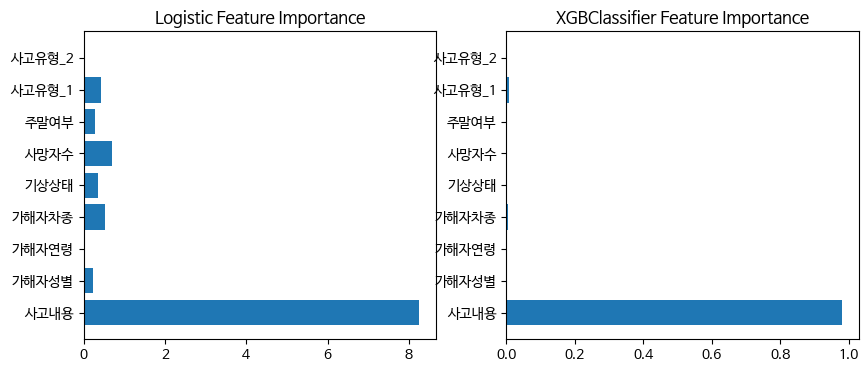

In [343]:

fig, axes = plt.subplots(1,2, figsize = (10, 4))

for name, model in model_lst :
  if name == 'Logistic' :
    logi_importance = np.abs(model.coef_[0])
    logi_featuers = X.columns
    axes[0].barh(logi_featuers, logi_importance)
    axes[0].set_title('Logistic Feature Importance')


  elif  name == 'xgb':
    importance = model.feature_importances_
    features = model.feature_names_in_
    axes[1].barh(features, importance)
    axes[1].set_title('XGBClassifier Feature Importance')

üìä ÌÜµÍ≥ÑÎ∂ÑÏÑù
##### ‚úÖ 1. Ïó∞Î†πÎåÄÎ≥ÑÎ°ú Ìó§ÎìúÏÖã ÏÑ†Ìò∏ÎèÑÏóê Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄÎ•º Í≤ÄÏ†ïÌïòÍ∏∞ ÏúÑÌïú Í∑ÄÎ¨¥Í∞ÄÏÑ§Í≥º Ïó∞Íµ¨Í∞ÄÏÑ§ÏùÑ ÏÑ§Ï†ï

In [352]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p6.csv')

# 3Í∞ú Ïó∞Î†πÏ∏µ (Ï≤≠ÎÖÑ Ïû•ÎÖÑ ÎÖ∏ÎÖÑ)Ïùò A Ìó§ÎìúÏÖãÏùò ÏÑ†Ìò∏ÎèÑ (1,2,3/ Î≤îÏ£ºÌòï) ÏÑ§Î¨∏Ï°∞ÏÇ¨
# df['ÎÇòÏù¥'].value_counts()

tab = pd.crosstab(df['ÎÇòÏù¥'], df['ÏÑ†Ìò∏ÎèÑ'])
stat, p_val, dof , expected = chi2_contingency(tab)
print(p_val)

print('''
Í∑ÄÎ¨¥ Í∞ÄÏÑ§ : Ïó∞Î†πÎåÄÎ≥ÑÎ°ú Ìó§ÎìúÏÖã ÏÑ†Ìò∏ÎèÑÏóê Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.
ÎåÄÎ¶Ω Í∞ÄÏÑ§ : Ïó∞Î†πÎåÄÎ≥ÑÎ°ú Ìó§ÎìúÏÖã ÏÑ†Ìò∏ÎèÑÏóê Ï∞®Ïù¥Í∞Ä ÏûàÎã§.
''')
if p_val < 0.05 :
  print('Ïó∞Î†πÎåÄÎ≥ÑÎ°ú Ìó§ÎìúÏÖã ÏÑ†Ìò∏ÎèÑÏóê Ï∞®Ïù¥Í∞Ä ÏûàÎã§.')
else :
  print('Ïó∞Î†πÎåÄÎ≥ÑÎ°ú Ìó§ÎìúÏÖã ÏÑ†Ìò∏ÎèÑÏóê Ï∞®Ïù¥Í∞Ä ÏóÜÎã§')

0.9919538273457956

Í∑ÄÎ¨¥ Í∞ÄÏÑ§ : Ïó∞Î†πÎåÄÎ≥ÑÎ°ú Ìó§ÎìúÏÖã ÏÑ†Ìò∏ÎèÑÏóê Ï∞®Ïù¥Í∞Ä ÏóÜÎã§. 
ÎåÄÎ¶Ω Í∞ÄÏÑ§ : Ïó∞Î†πÎåÄÎ≥ÑÎ°ú Ìó§ÎìúÏÖã ÏÑ†Ìò∏ÎèÑÏóê Ï∞®Ïù¥Í∞Ä ÏûàÎã§. 

Ïó∞Î†πÎåÄÎ≥ÑÎ°ú Ìó§ÎìúÏÖã ÏÑ†Ìò∏ÎèÑÏóê Ï∞®Ïù¥Í∞Ä ÏóÜÎã§


##### ‚úÖ 2.  ÏïÑÏù¥Î•º 6Î™Ö Í∞ÄÏßÑ Í∞ÄÏ†ïÏù¥ 5 Í∞ÄÏ°±Ïù¥Í≥†, ÏïÑÎì§/Îî∏ÏùÑ Ï∂úÏÉùÌï† ÌôïÎ•†ÏùÄ 0.5 </br> Îî∏Ïù¥ 4Î™Ö Ïù¥ÏÉÅÏù∏ Í∞ÄÍµ¨Í∞Ä 3 Í∞ÄÏ°± Ïù¥ÏÉÅÏùº ÌôïÎ•†ÏùÑ Íµ¨ÌïòÎùº

In [362]:
from scipy.stats import binom

# Îî∏Ïù¥ 4Î™Ö Ïù¥ÏÉÅÏù∏ Í∞ÄÍµ¨Í∞Ä 3Í∞ÄÏ°±
n = 6
p = 0.5

rv = binom(n, p)

# 1) ÏïÑÏù¥ 6Î™Ö Ï§ë Îî∏Ïù¥ 4Î™ÖÏù∏ Í≤ΩÏö∞
d_4 = 1 - rv.cdf(3)
print(f'ÏïÑÏù¥ 6Î™Ö Ï§ë Îî∏Ïù¥ 4Î™ÖÏù∏ Í≤ΩÏö∞ {d_4}')

# 2) Í∞ÄÏ°±Ïù¥ 5Í∞ÄÏ°± Ïù∏Îç∞, Í∞ÄÍµ¨Í∞Ä 3 Í∞ÄÏ°± Ïù¥ÏÉÅÏùºÎïå
rv2 = binom(5, d_4)
family_3 = 1 - rv2.cdf(2)

print(f'Í∞ÄÏ°±Ïù¥ 5Í∞ÄÏ°± Ïù∏Îç∞, Í∞ÄÍµ¨Í∞Ä 3 Í∞ÄÏ°± Ïù¥ÏÉÅÏùºÎïå {family_3}')

ÏïÑÏù¥ 6Î™Ö Ï§ë Îî∏Ïù¥ 4Î™ÖÏù∏ Í≤ΩÏö∞ 0.34375
Í∞ÄÏ°±Ïù¥ 5Í∞ÄÏ°± Ïù∏Îç∞, Í∞ÄÍµ¨Í∞Ä 3 Í∞ÄÏ°± Ïù¥ÏÉÅÏùºÎïå 0.2255459427833557


##### ‚úÖ 2. 5Í∞ÄÏ°± Ï§ë Î™á Í∞ÄÏ°±Ïù¥ 4Î™Ö Ïù¥ÏÉÅ Îî∏ÏùÑ Í∞ÄÏßà Í≤ÉÏúºÎ°ú Í∏∞ÎåÄÌï† Ïàò ÏûàÎäîÍ∞Ä?

In [365]:
# ÏïÑÏù¥ = 6, Îî∏ = 0.5
rv = binom(6, 0.5)
# Îî∏Ïù¥ 4Î™Ö Ïù¥ÏÉÅ
d_4_more = 1 - rv.cdf(3)

# 5Í∞ÄÏ°± Ï§ë Í∏∞ÎåÄÎêòÎäî Ïàò : Ï¥ù ÏãúÌñâÏàò x ÏÑ±Í≥µ ÌöüÏàò
print(d_4_more * 5)

1.71875


##### ‚úÖ 3Í∞úÏùò 3Í∞úÏùò Í≥µÏû•Ïù¥ ÏûàÍ≥†, 3Í∞úÏùò ÏßÄÏó≠Ïù¥ ÏûàÏäµÎãàÎã§. Í∞Å Í≥µÏû•ÏóêÏÑú Í∞Å ÏßÄÏó≠ÏúºÎ°ú Ï†úÌíàÏùÑ Î≥¥ÎÇ¥Îäî ÎπÑÏö©Í≥º ÏÉùÏÇ∞ Í∞ÄÎä• ÏàòÎüâ Î∞è Í∞Å ÏßÄÏó≠Ïùò ÏàòÏöîÎüâÏù¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

Í≥µÏû•Z	7ÎßåÏõê	4ÎßåÏõê	11ÎßåÏõê	30
Î™©ÌëúÎäî Í≥µÏû• X, Y, ZÏóêÏÑú Í∞Å ÏßÄÏó≠ÏúºÎ°ú Ï†úÌíàÏùÑ Î≥¥ÎÇ¥Îäî ÏµúÏÜå Î∞∞ÏÜ° ÎπÑÏö©ÏùÑ Íµ¨ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.

* Ï†úÏïΩ Ï°∞Í±¥:
* Í≥µÏû• X: ÏµúÎåÄ 40Í∞ú ÏÉùÏÇ∞ Í∞ÄÎä•
* Í≥µÏû• Y: ÏµúÎåÄ 50Í∞ú ÏÉùÏÇ∞ Í∞ÄÎä•
* Í≥µÏû• Z: ÏµúÎåÄ 30Í∞ú ÏÉùÏÇ∞ Í∞ÄÎä•
* ÏßÄÏó≠ 1: 30Í∞úÏùò Ï†úÌíà ÌïÑÏöî
* ÏßÄÏó≠ 2: 50Í∞úÏùò Ï†úÌíà ÌïÑÏöî
* ÏßÄÏó≠ 3: 20Í∞úÏùò Ï†úÌíà ÌïÑÏöîÍ≥µÏû•ÏóêÏÑú ÏÉùÏÇ∞Ìïú Ï†úÌíàÏùÑ 3ÏßÄÏó≠ÏúºÎ°ú Í∞ÄÎä•Ìïú Ï°∞Í±¥Ïóê ÎßûÍ≤å ÏµúÎåÄÎ°ú Î∞∞ÏÜ°ÌïúÎã§.
* Í∞Å Í≥µÏû•Í≥º Í∞Å ÏßÄÏó≠ ÏÇ¨Ïù¥Ïùò 1Í∞ú Ï†úÌíà Î∞∞ÏÜ° ÎπÑÏö©Ïù¥ ÏïÑÎûòÏôÄ Í∞ôÏùÑ Îïå, ÏµúÏÜå Î∞∞ÏÜ° ÎπÑÏö©ÏùÄ ÏñºÎßàÏù∏Í∞Ä?

In [381]:
from scipy.optimize import linprog

costs = [
    [8, 6, 10],  # Í≥µÏû•X -> ÏßÄÏó≠1, ÏßÄÏó≠2, ÏßÄÏó≠3
    [9, 12, 8],  # Í≥µÏû•Y -> ÏßÄÏó≠1, ÏßÄÏó≠2, ÏßÄÏó≠3
    [7, 4, 11],  # Í≥µÏû•Z -> ÏßÄÏó≠1, ÏßÄÏó≠2, ÏßÄÏó≠3
]


# Í≥µÏû•Î≥Ñ ÏµúÎåÄ ÏÉùÏÇ∞Îüâ Ï†úÏïΩ Ï°∞Í±¥ (Ìñâ Îã®ÏúÑ)
A_ub = np.zeros((3, 9))
limits = [40, 50, 30]  # Í≥µÏû• X, Y, Z ÏµúÎåÄ ÏÉùÏÇ∞ Í∞ÄÎä•Îüâ

for i in range(3):  # Í∞Å Í≥µÏû•Î≥Ñ
    A_ub[i, i*3:(i+1)*3] = 1



# ÏßÄÏó≠Î≥Ñ ÏàòÏöîÎüâÏùÑ ÎßåÏ°±ÌïòÎäî ÌèâÎì± Ï°∞Í±¥ (Ïó¥ Îã®ÏúÑ)
A_eq = np.zeros((3, 9))
demand = [30, 50, 20]  # ÏßÄÏó≠ 1, 2, 3 ÏàòÏöî

for j in range(3):  # Í∞Å ÏßÄÏó≠Î≥Ñ
    A_eq[j, j::3] = 1

bounds = [(0, None) for _ in range(9)]

res = linprog(c, A_ub=A_ub, b_ub=limits, A_eq=A_eq, b_eq=demand, bounds=bounds, method='highs')
res.fun

650.0